In [53]:
import pandas as pd
import os

# # Show current working directory - the directory where all your files are saved by default
# os.getcwd()

# Set path for new working directory
path = "C:/Users/Sarah/Faris Stuff/USM Data Science Masters Files/CDS503/Week 4 - 09 Mar/Data"
os.chdir(path) 

# # Check to see if current directory has changed
# os.getcwd()

# Read data from CSV to a data frame named df
df = pd.read_csv('titanic.csv') 
# Display the data
df

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


In [55]:
# rename columns to shorter, easier names to call
df.columns = ['survived', 'pclass', 'name', 'sex', 'age', 'sibspouse', 'parchild', 'fare']
# View column  names
df.columns

Index(['survived', 'pclass', 'name', 'sex', 'age', 'sibspouse', 'parchild',
       'fare'],
      dtype='object')

In [56]:
# Duplicate dataset to have one clean unedited one and one to work on
dfOri = df

# remove name column as it's useless to tell if the passanger survives or not
# Setting axis=1 means we want to drop a column, if axis=0, it's to remove a row)
df = df.drop('name', axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   survived   887 non-null    int64  
 1   pclass     887 non-null    int64  
 2   sex        887 non-null    object 
 3   age        887 non-null    float64
 4   sibspouse  887 non-null    int64  
 5   parchild   887 non-null    int64  
 6   fare       887 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.6+ KB


In [57]:
# Convert integer to string: survived, pclass, sex - because we need it as a category, not a number
df['survived'] = df['survived'].astype(str)
df['pclass'] = df['pclass'].astype(str)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   survived   887 non-null    object 
 1   pclass     887 non-null    object 
 2   sex        887 non-null    object 
 3   age        887 non-null    float64
 4   sibspouse  887 non-null    int64  
 5   parchild   887 non-null    int64  
 6   fare       887 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 48.6+ KB


In [58]:
df

,survived,pclass,sex,age,sibspouse,parchild,fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
882,0,2,male,27.0,0,0,13.0000
883,1,1,female,19.0,0,0,30.0000
884,0,3,female,7.0,1,2,23.4500
885,1,1,male,26.0,0,0,30.0000


In [59]:
# Gotta convert sex from string (male, female) to numerical representation (0, 1s) as some algos require numerical input data
# to do that, use something called Label Encoder

# Import LabelEncoder
from sklearn import preprocessing

# Create LabelEncoder
le = preprocessing.LabelEncoder()

# Convert string categories into numbers for sex
df['sex'] = le.fit_transform(df['sex'])
df.head()

,survived,pclass,sex,age,sibspouse,parchild,fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


In [60]:
df['sex'] = df['sex'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   survived   887 non-null    object 
 1   pclass     887 non-null    object 
 2   sex        887 non-null    object 
 3   age        887 non-null    float64
 4   sibspouse  887 non-null    int64  
 5   parchild   887 non-null    int64  
 6   fare       887 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 48.6+ KB


# Train and Validate KNN Classifier

### Split data into train, validation and test sets

In [61]:
# Indicate the target column
target = df['survived']

# features column are basically everything else that's not the target
features = df.drop('survived', axis = 1)

# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split the dataset into training + development set and test set, test size is 20%, training + development size is 80%
x, x_test, y, y_test = train_test_split(features, target, test_size = 0.2, random_state = 0)

# Split the dataset into training set and development set
x_train, x_dev, y_train, y_dev = train_test_split(x, y, test_size = 0.2, random_state = 10)

### Training a KNN model

In [62]:
# Import k-nearest neighbor classifier
from sklearn.neighbors import KNeighborsClassifier
# Create a KNN classifier with k = 1
knn = KNeighborsClassifier(n_neighbors = 1)
# Train the model using the training set
knn.fit(x_train, y_train)

,n_neighbors,1
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [63]:
# Predict the target for the development dataset
dev_predict = knn.predict(x_dev)
dev_predict

array(['0', '0', '1', '1', '0', '1', '0', '1', '0', '1', '1', '1', '1',
       '0', '1', '1', '0', '1', '1', '1', '0', '0', '1', '0', '0', '0',
       '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '1',
       '0', '0', '1', '1', '1', '1', '0', '0', '0', '0', '0', '1', '0',
       '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0',
       '0', '1', '0', '0', '0', '1', '0', '1', '0', '1', '0', '1', '1',
       '1', '0', '0', '0', '0', '1', '0', '0', '0', '1', '1', '0', '1',
       '1', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0',
       '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0',
       '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0',
       '1', '0', '1', '0', '0', '1', '1', '0', '1', '1', '0', '1'],
      dtype=object)

### Evaluate the knn model on development set

In [64]:
# Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Compute the model accuracy on the development set: How often is the classifier correct?
print("Accuracy: ", metrics.accuracy_score(y_dev, dev_predict))

Accuracy:  0.6901408450704225


# Parameter Tuning

In [65]:
# Create a KNN classifier with k = 5
knn = KNeighborsClassifier(n_neighbors = 5)
# Train the model using the training set
knn.fit(x_train, y_train)
# Predict the target for the development set
dev_predict = knn.predict(x_dev)
# Compute the model accuracy on the development set: How often is the classifier correct?
print("Accuracy: ", metrics.accuracy_score(y_dev, dev_predict))

Accuracy:  0.6830985915492958


Optimal Dev k is 28 with an accuracy of 0.7817


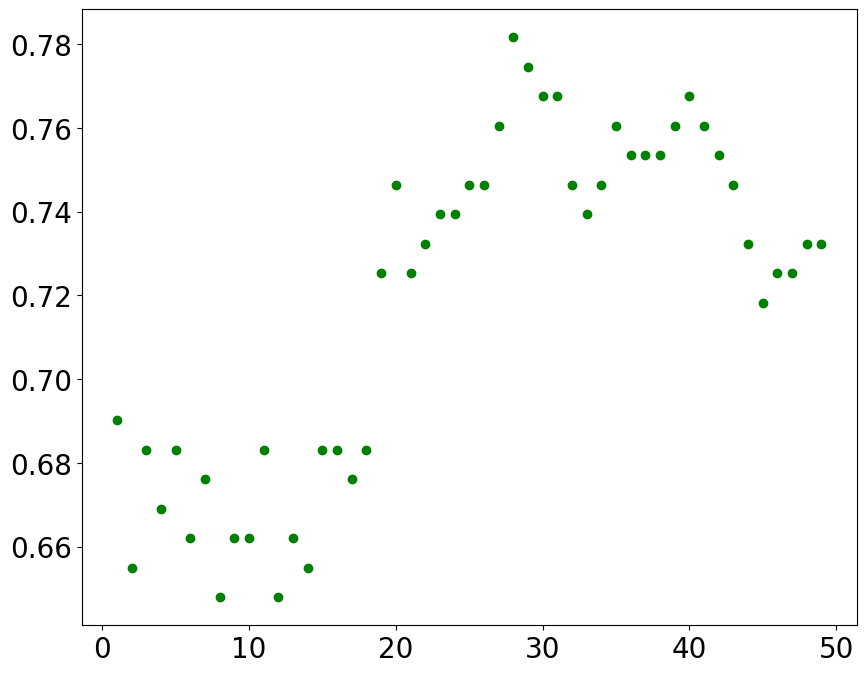

In [66]:
# use for loop to identify best value of k
# Initialize 2 empty lists (K and validation) to store the values of k and validation score
# Initialize 1 empty dictionary (scores) to store the k:validation_score (key:value) pairs
# Initialize variables to store the best results
K = [] 
validation = []
scores = {}
best_k = 0
best_accuracy = 0.0

# The for loop will test k values from 1 to 29
for k in range(1, 50): 
    clf = KNeighborsClassifier(n_neighbors = k) 
    clf.fit(x_train, y_train) 
    # Can also use the score() function to compute accuracy
    # Compute accuracy by applying the model on the development set
    validation_score = clf.score(x_dev, y_dev)
    # Adds a single item (k value) to the list
    K.append(k) 
    validation.append(validation_score) 
    # A dictionary holds key:value pairs
    # Store the validation score for each value of k (k is the key)
    scores[k] = [validation_score] 

    # Check if the current accuracy is the largest
    if validation_score > best_accuracy:
        best_accuracy = validation_score
        best_k = k

# 6. Print the best k and its accuracy
print(f"Optimal Dev k is {best_k} with an accuracy of {best_accuracy:.4f}")

# Import matplotlib library
import matplotlib.pyplot as plt 
# Set font and plot size to be larger
plt.rcParams.update({'font.size': 20, 'figure.figsize': (10, 8)})
plt.scatter(K, validation, color ='g') 
plt.show() 

In [67]:
# Create a KNN classifier with k = 28 and manhattan_distance (p = 1)
knn = KNeighborsClassifier(n_neighbors = best_k, p = 1)
# Train the model using the training set
knn.fit(x_train, y_train)
# Predict the target for the development set
dev_predict = knn.predict(x_dev)
# Compute the model accuracy on the development set: How often is the classifier correct?
print("Accuracy (Dev, with manhattan distance 1): ", metrics.accuracy_score(y_dev, dev_predict))

Accuracy (Dev, with manhattan distance 1):  0.7676056338028169


In [68]:
# Create a KNN classifier with k = 28
knn = KNeighborsClassifier(n_neighbors = best_k)
# Train the model using the training set
knn.fit(x_train, y_train)
# Predict the target for the development dataset
dev_predict = knn.predict(x_dev)
# Compute the model accuracy on the development set: How often is the classifier correct?
print("Accuracy (Dev): ", metrics.accuracy_score(y_dev, dev_predict))

Accuracy (Dev):  0.7816901408450704


## Proof of Concept (y_dev vs dev_predict accuracy)

In [69]:
# compare between dev_predict and y_dev with a good old true/false check to see if the ratio is correct, compare against accuracy
# create a reset index version of the y_dev dataset because the previous index took random rows 
y_devResIndx = y_dev.reset_index(drop=True)

# convert dev_predict arrays into data frame
dfJustToSee = pd.DataFrame(dev_predict, columns=['Predict'])
dfJustToSee['Actual'] = y_devResIndx

# write a function to input true/false values of the predict vs actual rows 
# **** non vectorized code, less efficient **** 
def PredictActualComp(row):
    if row['Predict'] == row['Actual']:
        val = 'TRUE'
    else:
        val = 'FALSE'
    return val

# apply the function to a new column called Comparison
dfJustToSee['Comparison1'] = dfJustToSee.apply(PredictActualComp, axis=1)
# **** non vectorized code, less efficient **** 

# **** vectorized code, MORE efficient **** 
import numpy as np
dfJustToSee['Comparison2'] = np.where(dfJustToSee['Predict'] == dfJustToSee['Actual'], 'TRUE', 'FALSE')
# **** vectorized code, MORE efficient **** 

print(dfJustToSee.head())

# Count the occurrences of each class
print(dfJustToSee['Comparison1'].value_counts())

print(111/142)

  Predict Actual Comparison1 Comparison2
0       0      0        TRUE        TRUE
1       1      1        TRUE        TRUE
2       1      0       FALSE       FALSE
3       1      1        TRUE        TRUE
4       0      1       FALSE       FALSE
Comparison1
TRUE     111
FALSE     31
Name: count, dtype: int64
0.7816901408450704


In [70]:
# Predict the target for the test dataset
test_predict = knn.predict(x_test)
# Compute the model accuracy on the development set: How often is the classifier correct?
print("Accuracy (Test): ", metrics.accuracy_score(y_test, test_predict))

Accuracy (Test):  0.7247191011235955


#### ^ Validation accuracy and test accuracy does not differ by much. 
#### We can conclude that the KNN classifier does not suffer from overfitting and generalizes well on new data

# Features Standardization

In [72]:
from sklearn import preprocessing

# keep the features column names for later
names = features.columns

# Create the Scaler object
scaler = preprocessing.StandardScaler()

# Fit the data on the Scaler object
scaled_features = scaler.fit_transform(features)

# After standardization, scaled_features is transformed into an array so we need to convert back to dataframe
scaled_features = pd.DataFrame(scaled_features, columns = names)
scaled_features.head()

,pclass,sex,age,sibspouse,parchild,fare
0,0.830524,0.740266,-0.529366,0.429904,-0.474981,-0.503586
1,-1.561277,-1.350867,0.604265,0.429904,-0.474981,0.783412
2,0.830524,-1.350867,-0.245958,-0.475856,-0.474981,-0.490020
3,-1.561277,-1.350867,0.391709,0.429904,-0.474981,0.417948
4,0.830524,0.740266,0.391709,-0.475856,-0.474981,-0.487507


In [73]:
# Split data into train, validation and test sets
# Import train_test_split function
from sklearn.model_selection import train_test_split
# Split the dataset into training + development set and test set
x, x_test, y, y_test = train_test_split(scaled_features, target, test_size = 0.2, random_state = 0)
# Split the dataset into training set and development set
x_train, x_dev, y_train, y_dev = train_test_split(x, y, test_size = 0.2, random_state = 10)

Optimal Dev k is 3 with an accuracy of 0.8380


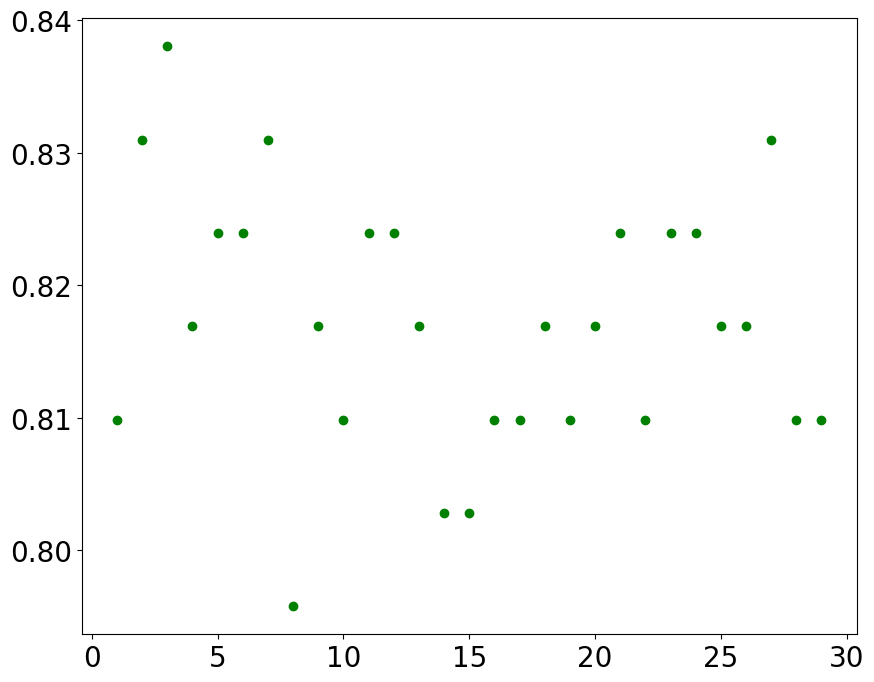

In [74]:
# use for loop to identify best value of k
# Initialize 2 empty lists (K and validation) to store the values of k and validation score
# Initialize 1 empty dictionary (scores) to store the k:validation_score (key:value) pairs
# Initialize variables to store the best results
K = [] 
validation = []
scores = {}
best_k = 0
best_accuracy = 0.0

# The for loop will test k values from 1 to 29
for k in range(1, 30): 
    clf = KNeighborsClassifier(n_neighbors = k) 
    clf.fit(x_train, y_train) 
    # Can also use the score() function to compute accuracy
    # Compute accuracy by applying the model on the development set
    validation_score = clf.score(x_dev, y_dev)
    # Adds a single item (k value) to the list
    K.append(k) 
    validation.append(validation_score) 
    # A dictionary holds key:value pairs
    # Store the validation score for each value of k (k is the key)
    scores[k] = [validation_score] 

    # Check if the current accuracy is the largest
    if validation_score > best_accuracy:
        best_accuracy = validation_score
        best_k = k

# 6. Print the best k and its accuracy
print(f"Optimal Dev k is {best_k} with an accuracy of {best_accuracy:.4f}")

# Set font and plot size to be larger
plt.rcParams.update({'font.size': 20, 'figure.figsize': (10, 8)})
plt.scatter(K, validation, color ='g') 
plt.show() 

In [76]:
# Create a KNN classifier with k = 3
knn = KNeighborsClassifier(n_neighbors = best_k)
# Train the model using the training set
knn.fit(x_train, y_train)
# Predict the target for the development dataset
dev_predict = knn.predict(x_dev)
# Compute the model accuracy on the development set: How often is the classifier correct?
print("Accuracy (Dev): ", metrics.accuracy_score(y_dev, dev_predict))

Accuracy (Dev):  0.8380281690140845


In [77]:
# Predict the target for the test dataset
test_predict = knn.predict(x_test)
# Compute the model accuracy on the development set: How often is the classifier correct?
print("Accuracy (Test): ", metrics.accuracy_score(y_test, test_predict))

Accuracy (Test):  0.7696629213483146


In [49]:
# Save the original data after data cleaning
df.to_csv(r'titanic_unscaled.csv', index = False, header = True)
df.head()

,survived,pclass,sex,age,sibspouse,parchild,fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


In [50]:
# Concatenate scaled features with target
df_scaled = pd.concat([target, scaled_features], axis=1)
# Save the data with target and scaled features
df_scaled.to_csv(r'titanic_scaled.csv', index = False, header = True)
df_scaled.head()

,survived,pclass,sex,age,sibspouse,parchild,fare
0,0,0.830524,0.740266,-0.529366,0.429904,-0.474981,-0.503586
1,1,-1.561277,-1.350867,0.604265,0.429904,-0.474981,0.783412
2,1,0.830524,-1.350867,-0.245958,-0.475856,-0.474981,-0.490020
3,1,-1.561277,-1.350867,0.391709,0.429904,-0.474981,0.417948
4,0,0.830524,0.740266,0.391709,-0.475856,-0.474981,-0.487507
